<a href="https://colab.research.google.com/github/anacasicande/Modelamiento/blob/main/Parcial3_AnayJaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelación de sistemas Químicos
Departamento de Ingeniería Química y de Alimentos


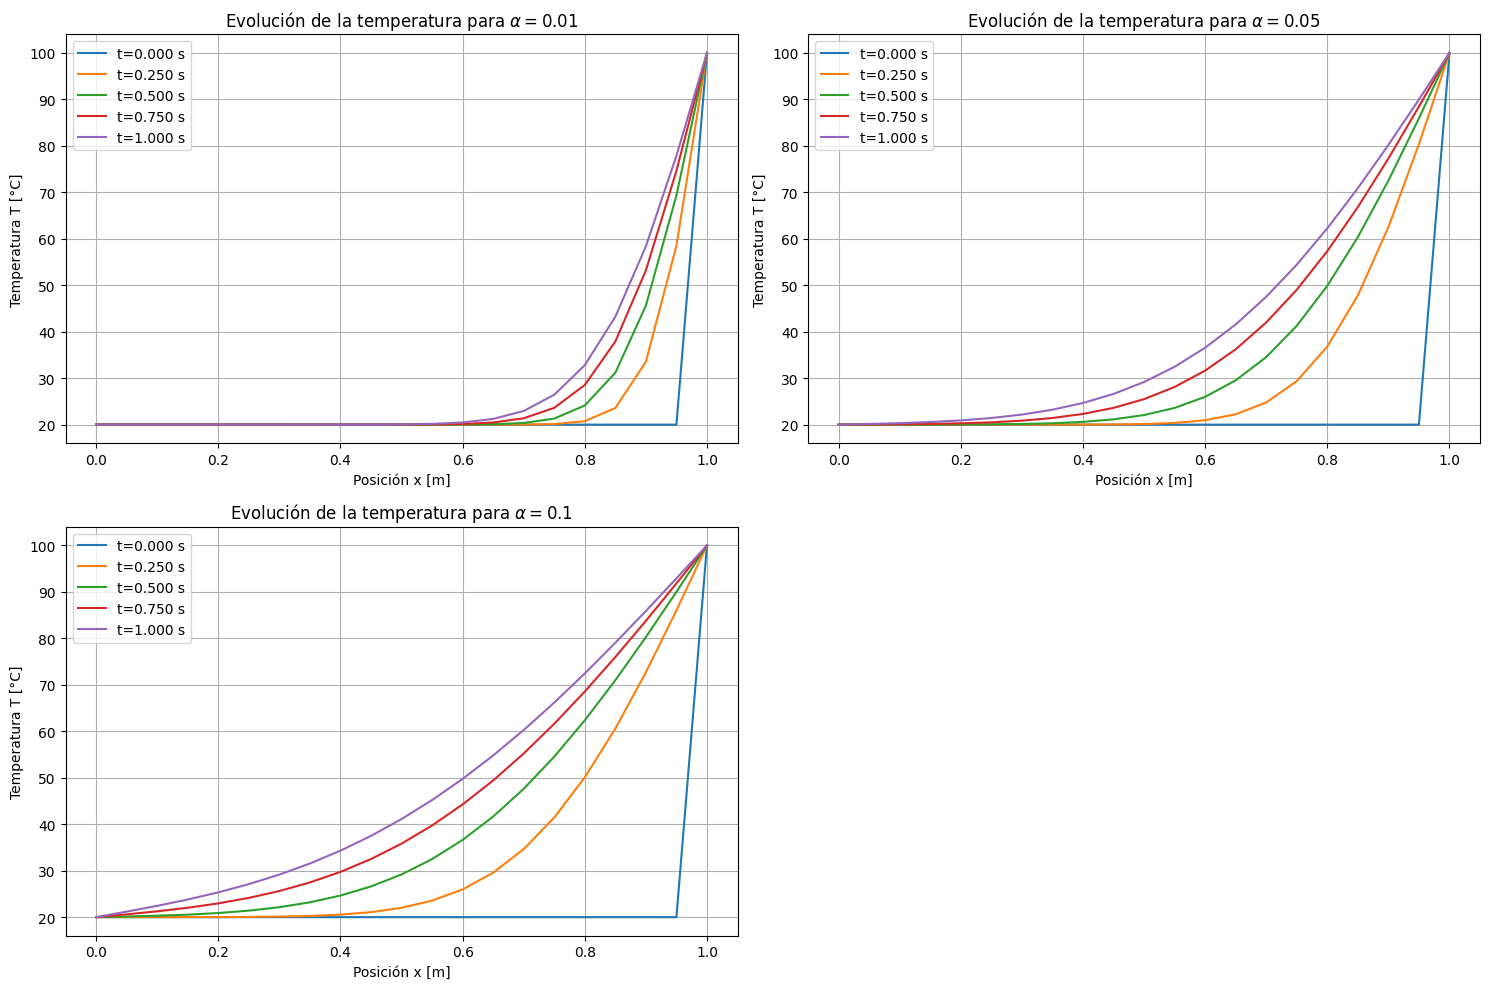

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros generales
L = 1.0                # Longitud de la barra [m]
nx = 20                # Número de puntos espaciales
dx = L / nx            # Tamaño del paso espacial
dt = 0.01              # Paso temporal [s]
t_total = 1.0          # Tiempo total de simulación [s]
nt = int(t_total / dt) # Número de pasos de tiempo
x = np.linspace(0, L, nx + 1)  # Puntos espaciales
alphas = [0.01, 0.05, 0.1]     # Valores de difusividad térmica

# Función para resolver la ecuación de calor con un valor de alpha
def resolver_ecuacion(alpha):
    # Inicialización de temperatura
    T = np.ones(nx + 1) * 20  # T(x, 0) = 20°C
    T[0] = 20                 # T(0, t) = 20°C
    T[-1] = 100               # T(L, t) = 100°C

    # Factor de estabilidad
    Fo = alpha * dt / dx**2
    if Fo > 0.5:
        raise ValueError(f"El paso de tiempo es demasiado grande para la estabilidad (Fo = {Fo:.2f}).")

    # Resolución con diferencias finitas explícitas
    T_all = [T.copy()]  # Almacena todas las distribuciones de temperatura
    for _ in range(nt):
        T_new = T.copy()
        for i in range(1, nx):
            T_new[i] = T[i] + Fo * (T[i - 1] - 2 * T[i] + T[i + 1])  # Ecuación de diferencias finitas
        T = T_new
        T_all.append(T.copy())

    return np.array(T_all)

# Resolver para cada valor de alpha
resultados = {}
for alpha in alphas:
    resultados[alpha] = resolver_ecuacion(alpha)

# Selección de índices temporales para graficar
time_indices = [0, int(nt * 0.25), int(nt * 0.5), int(nt * 0.75), nt]  # t = 0, 0.25s, 0.5s, 0.75s, 1.0s

# Graficar resultados para cada valor de alpha
plt.figure(figsize=(15, 10))
for idx, (alpha, T_all) in enumerate(resultados.items(), 1):
    plt.subplot(2, 2, idx)  # Organiza las gráficas en una cuadrícula
    for t_idx in time_indices:
        plt.plot(x, T_all[t_idx, :], label=f"t={t_idx * dt:.3f} s")
    plt.title(f"Evolución de la temperatura para $\\alpha={alpha}$")
    plt.xlabel("Posición x [m]")
    plt.ylabel("Temperatura T [°C]")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


Entre más grande sea el valor del Alpha (difusividad térmica) la transferencia del calor se vuelve más rápida. Siguiendo con esto, para valores altos de Alpha se iguala la temperatura a lo largo de la barra en menor tiempo,dando una curva mucho mas suave y pronunciada que, a valores bajos de Alpha en donde la temperatura requiere de mayor tiempo para llegar a los valores deseados.



Cantidad de elementos por cluster para 2 clusters:
Cluster
0    1769
1     352
Name: count, dtype: int64


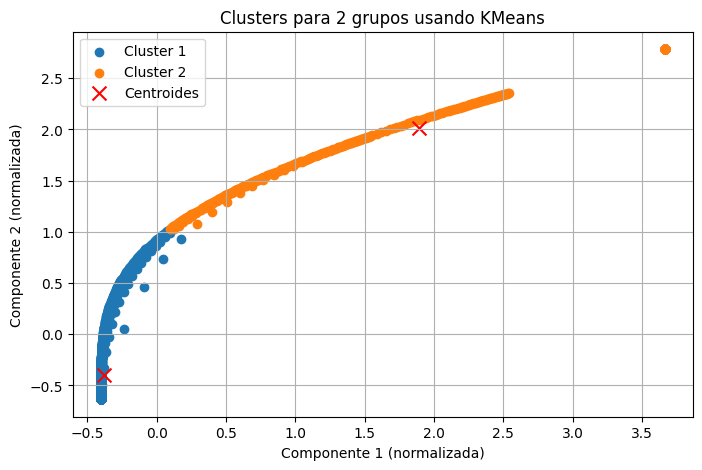


Cantidad de elementos por cluster para 3 clusters:
Cluster
0    1510
2     394
1     217
Name: count, dtype: int64


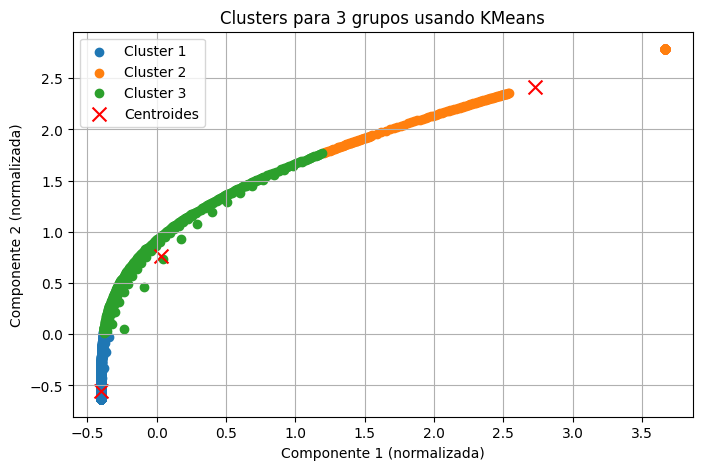


Cantidad de elementos por cluster para 4 clusters:
Cluster
0    1389
2     369
1     201
3     162
Name: count, dtype: int64


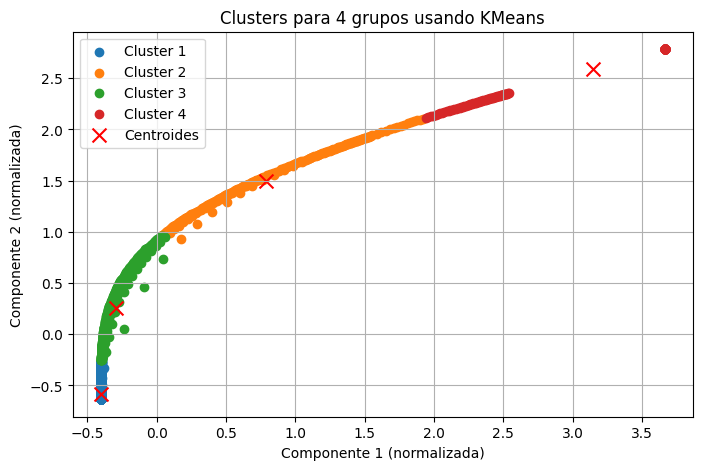


Cantidad de elementos por cluster para 5 clusters:
Cluster
0    1321
2     356
4     207
1     136
3     101
Name: count, dtype: int64


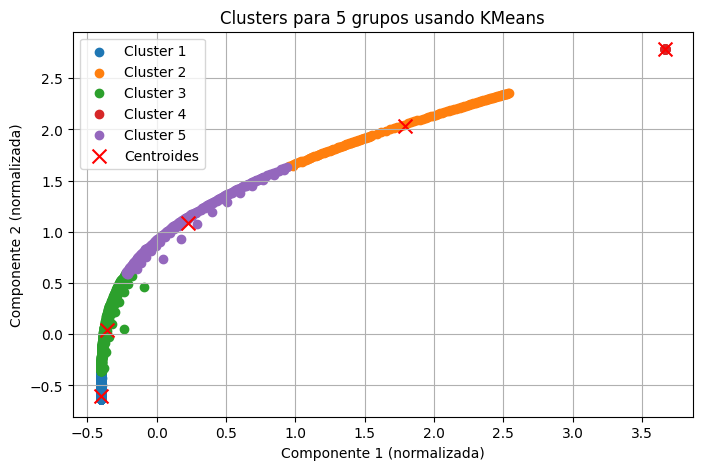

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data_matrix = np.vstack([res.flatten() for res in resultados.values()]).T
dataset = pd.DataFrame(data_matrix, columns=[f'alpha={alpha}' for alpha in alphas])

# Preparación de los datos (normalización)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)

# Aplicación de KMeans
clusters_list = [2,3,4,5]  # Número de clusters (puedes ajustar este valor)
for n_clusters in clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data_scaled)
    centroids = kmeans.cluster_centers_
    # Agregar etiquetas de cluster al dataset
    dataset['Cluster'] = labels

    # Visualización de cantidad de elementos por cluster
    cluster_counts = dataset['Cluster'].value_counts()
    print(f"\nCantidad de elementos por cluster para {n_clusters} clusters:")
    print(cluster_counts)
    # Graficar los clusters y los centroides
    plt.figure(figsize=(8, 5))
    for cluster in range(n_clusters):
        # Graficar puntos del cluster
        cluster_data = data_scaled[labels == cluster]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster + 1}')
    # Graficar centroides
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroides')

    plt.title(f'Clusters para {n_clusters} grupos usando KMeans')
    plt.xlabel('Componente 1 (normalizada)')
    plt.ylabel('Componente 2 (normalizada)')
    plt.legend()
    plt.grid()
    plt.show()


Para el K means los perfiles que tienen una difusión baja tienden a agruparse mas a diferencia de los perfiles con difusión alta y que los valores de temperaturas bajas tienen mas peso al momento de la agrupacion comparado con aquellos con temperaturas mas altas. los patrones que existen es que a mayor numero de clusters los datos que agrupa el k-means se vuelven mas estrictos.

Al aumentar el número de clusters en el sistema, se podría tener simulaciones más específicas, ya que son más datos lo que entran, por esta razón entre mayor sea el número de clusters, mejor será la simulación.Los valores de Alpha, nos permite determinar de una forma más detallada la variación de la difusión térmica a lo largo de la simulación, teniendo como parámetros el tiempo y el material que se use.
